In [0]:
!wget -q https://www.dropbox.com/s/yigijs122togfk4/embeddings.dat?dl=1  -O embeddings.dat
!wget -q https://www.dropbox.com/s/qdhtexle4p0ngc3/DatasetSplitCSV.zip?dl=1 -O DatasetSplitCSV.zip
!unzip -q DatasetSplitCSV.zip

In [0]:
import pandas as pd
import numpy as np

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [0]:
#Parameters
params={}
params["embeddingType"]="raw" # post
params["mapReduceFunc"]="Pad" # Avg

In [0]:
def mapReduce(embed,funcName):
    if funcName=="Avg":
        embed=np.average(embed,axis=0)
    if funcName=="Pad":
        embed=np.pad(embed, [( 0,6-embed.shape[0]), (0, 0)], mode='constant', constant_values=0)
        embed=embed.reshape(-1)
    return embed

In [0]:
train=pd.read_csv("train.csv",header=None)
valid=pd.read_csv("valid.csv",header=None)
test=pd.read_csv("test.csv",header=None)
embeddings=np.load("embeddings.dat",allow_pickle=True)

In [6]:
embeddings["post"]['03-02-04-01-02-02-02.wav'].dtype

dtype('uint8')

In [7]:
list(embeddings['raw'].keys())[2000]

'03-02-04-01-02-02-02.wav'

In [0]:
# test=[]
# for x in train[0]:
#     embed=embeddings[params["embeddingType"]][x]

#     test.append(embed)

In [0]:
# np.array(test).shape

In [0]:
# test[0].s

In [0]:
# padded_inputs[0]

In [0]:
x_train=[]
x_val=[]
x_test=[]
for x in train[0]:
    embed=embeddings[params["embeddingType"]][x]
    x_train.append(mapReduce(embed,params["mapReduceFunc"]))

for x in valid[0]:
    embed=embeddings[params["embeddingType"]][x]
    x_val.append(mapReduce(embed,params["mapReduceFunc"]))

for x in test[0]:
    embed=embeddings[params["embeddingType"]][x]
    x_test.append(mapReduce(embed,params["mapReduceFunc"]))

x_train=np.array(x_train)
x_val=np.array(x_val)
x_test=np.array(x_test)

y_train=np.array(train[1].astype('category').cat.codes)
y_val=np.array(valid[1].astype('category').cat.codes)
y_test=np.array(test[1].astype('category').cat.codes)



Average Embeddings

Classification report for classifier NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.63      0.58      0.61        74
           1       0.56      0.65      0.60        78
           2       0.40      0.31      0.35        32
           3       0.70      0.51      0.59        78
           4       0.39      0.50      0.44        64
           5       0.41      0.31      0.35        36
           6       0.39      0.47      0.42        77
           7       0.71      0.65      0.68        52

    accuracy                           0.52       491
   macro avg       0.52      0.50      0.51       491
weighted avg       0.54      0.52      0.53       491


Confusion matrix:
[[43  2  3  3 15  1  4  3]
 [ 0 5

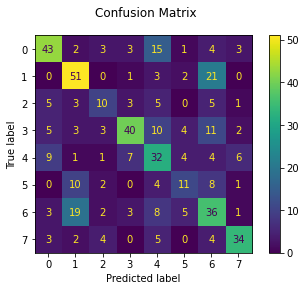

In [22]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# Create a classifier: a support vector classifier
classifier = svm.NuSVC()

# # Split data into train and test subsets
# X_train, X_test, y_train, y_test = train_test_split(
#     data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(x_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(x_test)


print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [19]:
from collections import Counter
Counter(y_train)

Counter({0: 228, 1: 222, 2: 117, 3: 223, 4: 224, 5: 110, 6: 232, 7: 114})

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
        #  "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


X_train, X_test, y_train, y_test = x_train, x_test, y_train, y_test

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    print(name)
    # ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(score)


Nearest Neighbors
0.439918533604888
Linear SVM
0.4480651731160896
RBF SVM
0.164969450101833
Decision Tree
0.3054989816700611
Random Forest
0.27494908350305497
Neural Net
0.5560081466395111
AdaBoost
0.3258655804480652
Naive Bayes
0.24236252545824846
QDA


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.10590631364562118
